# Transform Domain and Linear Filters

---

In this practical work, we study some tools to analyze images in the space-frequency domain. We analyze the spectral content of different images and see the effects of aliasing and experiment with filtering in the frequency domain.

## 1 Lab configuration

First of all, we will make sure to install the requeried toolboxes for this excercise (you may need to re-start the runtime after this step):

In [ ]:
!pip install --upgrade numpy scikit-image pillow plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


It may be useful to have an efficient way to transfer data from your google drive to colaboratory. This can be done by mounting your google drive in the colaboratory environment. Use your own image (grayscale) and the provided `test1.bmp`:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget "https://drive.google.com/uc?id=1eycfbbHEODVwvw0ZTNOC86W9SluaC-Lt" -O "test1.bmp"

--2023-03-03 07:40:53--  https://drive.google.com/uc?id=1eycfbbHEODVwvw0ZTNOC86W9SluaC-Lt
Resolving drive.google.com (drive.google.com)... 108.177.127.139, 108.177.127.113, 108.177.127.100, ...
Connecting to drive.google.com (drive.google.com)|108.177.127.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g3dujnl0hbg1ughji0kgj5li0k6ouvf3/1677829200000/01169085275889637052/*/1eycfbbHEODVwvw0ZTNOC86W9SluaC-Lt?uuid=6fc5d8f9-bab3-4286-8e65-3e53e8722797 [following]
--2023-03-03 07:40:53--  https://doc-04-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g3dujnl0hbg1ughji0kgj5li0k6ouvf3/1677829200000/01169085275889637052/*/1eycfbbHEODVwvw0ZTNOC86W9SluaC-Lt?uuid=6fc5d8f9-bab3-4286-8e65-3e53e8722797
Resolving doc-04-64-docs.googleusercontent.com (doc-04-64-docs.googleusercontent.com)... 173.194.69.132, 2a00:1450:4013:c04::84
Connecting to do

Display the images to check they have been uploaded correctly. Please change the name of the file you uploaded in the previous section.

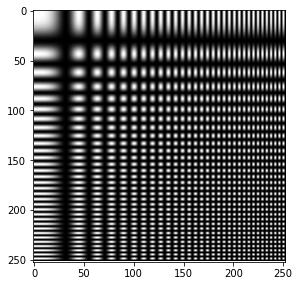

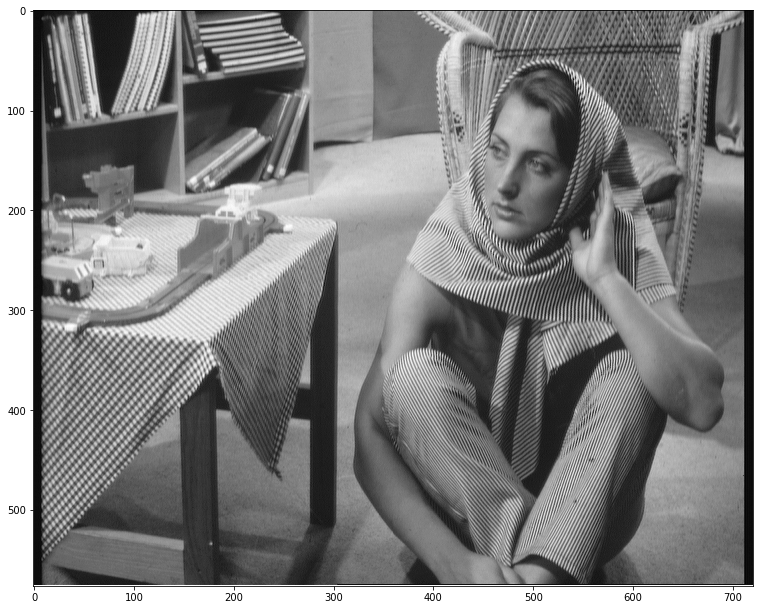

In [ ]:
from skimage import io as skio
from skimage import transform as sktf
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import image as mpimg


# Read the files from notebook disk
test1 = skio.imread('test1.bmp')
img = skio.imread('barbara_gray.bmp',as_gray=True)

def display_image(img, title='', size=None):
  #plt.subplot(1,2,1)
  plt.gray()
  h = plt.imshow(img, interpolation='none')
  if size:
    dpi = h.figure.get_dpi()/size
    h.figure.set_figwidth(img.shape[1] / dpi)
    h.figure.set_figheight(img.shape[0] / dpi)
    h.figure.canvas.manager.resize(img.shape[1] + 1, img.shape[0] + 1)
    h.axes.set_position([0, 0, 1, 1])
    h.axes.set_xlim(-1, img.shape[1])
    h.axes.set_ylim(img.shape[0], -1)
  plt.grid(False)
  plt.title(title)  
  plt.show()

def display_ft(ft, title='', centered=True):
  N = ft.shape[0]
  if centered:
    x = np.linspace(-0.5, 0.5, N)
    y = np.linspace(-0.5, 0.5, N)
  else:
    x = np.linspace(0, 1.0, N)
    y = np.linspace(0, 1.0, N)
  X, Y = np.meshgrid(x, y)
  fig = go.Figure(data=[go.Surface(z=ft,x=X,y=Y)])
  fig.update_layout(title=title)
  fig.update_layout(scene = dict(xaxis_title='Fx', yaxis_title='Fy', zaxis_title='FT'))
  fig.show()

def display_dft(ft, title=''):
  fig = go.Figure(data=[go.Surface(z=ft)])
  fig.update_layout(title=title)
  fig.update_layout(scene = dict(xaxis_title='k', yaxis_title='l', zaxis_title='DFT'))
  fig.show()

display_image(test1, size=1)
display_image(img, size=1)

## 2	Discrete Fourier Transform (DFT) and its representation


---


Now we'll display the transforms of these images. We'll benefit from the case-sensitive of python to name the transform in capital letters. First, we compute the transform:


In [ ]:
IMG = np.fft.fft2(img)


Then, we display its modulus. We need to display the values in a logarithmic scale (you can try what would happen if we use the linear scale, i.e. without the log):

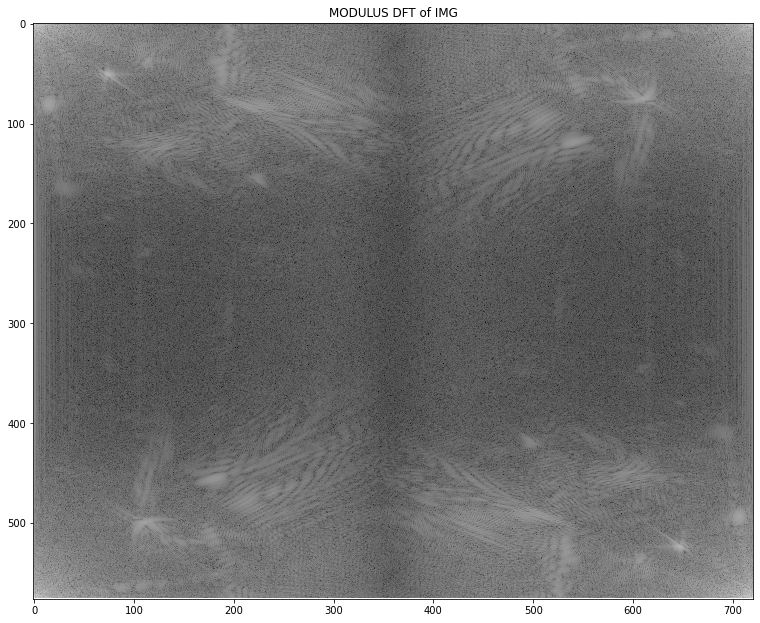

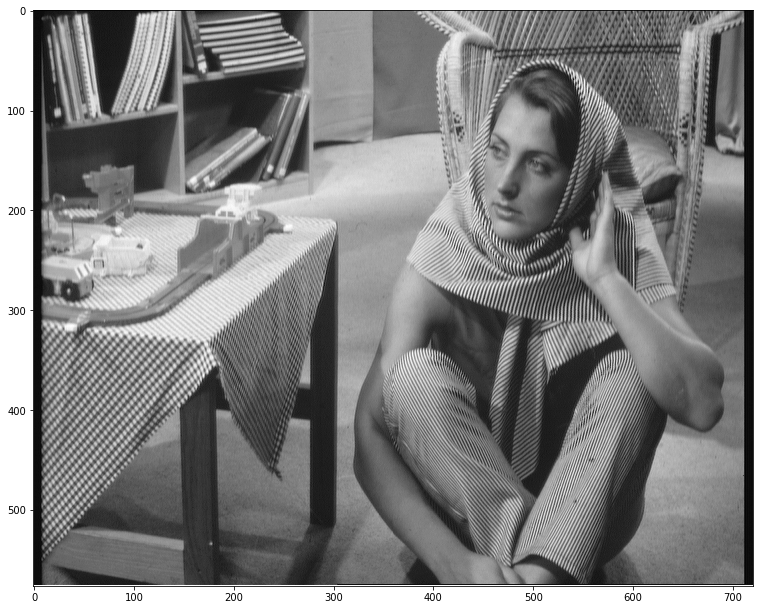

In [ ]:
display_image(np.log(1+np.abs(IMG)), title='MODULUS DFT of IMG', size=1)
display_image(img, size=1)

The DC component in the transform domain of IMG is located in the top left corner of the display. Remember that the spectrum of a discrete signal is $2\pi$-periodic. The DFT represents with N samples (if N is the length of the transform) one period of the spectrum. In 2D, the transform image has period $NxN$. In fact, the transform matrix IMG that we have computed presents only the samples of the fundamental period from $[0,2\pi) x [0,2\pi)$.

To visualize image transforms, we use to display the DC component in the center of the picture. In this way, it is easier to see the conjugate symmetry of the transform of a real signal. We use the function fftshift() to do this: 

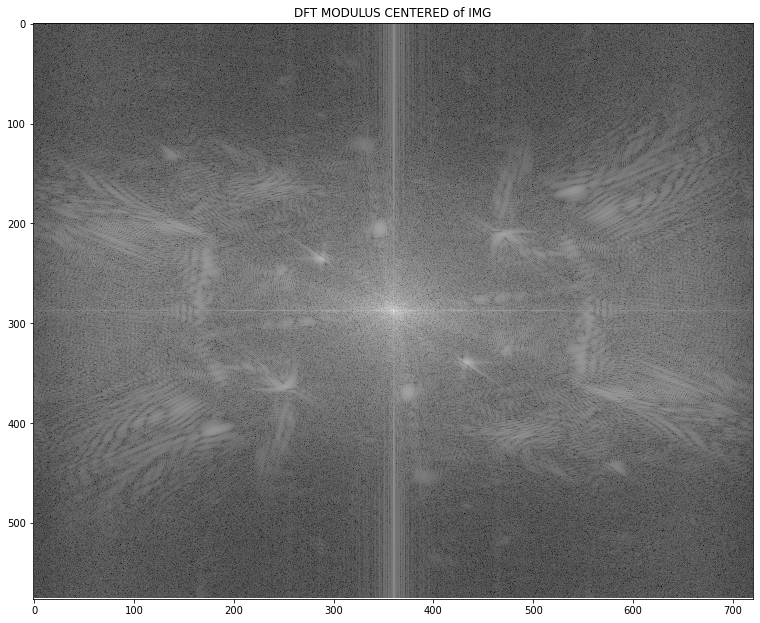

In [ ]:
IMG_mod=np.fft.fftshift(np.log(1+np.abs(IMG)))
display_image(IMG_mod, title='DFT MODULUS CENTERED of IMG', size=1)

<font color='purple'>Try to relate details observed in the image spectra with the original content.</font>

---
<font color='red'>Answer: 
We can observe high energy in frequencies (1/4,1/4) in the centered dft modulus representation. This is due to the fact that the energy changes in the images will be in diagonal direction and pretty fast (as the changes in the modulus are fast too). Having said that, we can say that this point for example corresponds to the change of values of pixels from the mantel of the table.
</font> 

Now, you can follow the same process for `test1` image to generate the modulus of its transform. Write the necessary  commands. As before, use capital letters to name the transform: `TEST1` and `TEST1_mod`. As can be seen, the `test1` image is a low pass signal. 

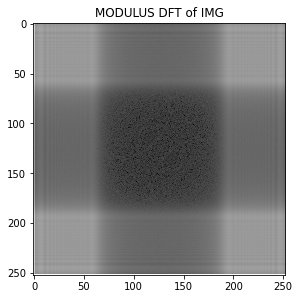

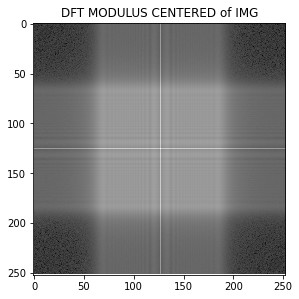

In [ ]:
# Display test1 DFT
TEST1 = np.fft.fft2(test1)
display_image(np.log(1+np.abs(TEST1)), title='MODULUS DFT of IMG', size=1)
TEST1_mod=np.fft.fftshift(np.log(1+np.abs(TEST1)))
display_image(TEST1_mod, title='DFT MODULUS CENTERED of IMG', size=1)


<font color='purple'>Estimate the horizontal and the vertical bandwidth of the image (give your answer with normalized frequencies).</font>

---
<font color='red'>Answer: 
Taking a look at the second image (dft modulus centered of the image) we can clearly see that horizontal and vertical bandwidth is 1/2. That is because the important changes of energy are produced in the frequencies -1/4 and 1/4 horizontally and vertically speaking.
</font>  


## 3 Down sampling and aliasing


---

Nyquist theorem establishes that we should limit the bandwidth of a given signal before sampling (or downsampling) to half the new sampling frequency. Otherwise, aliasing might occur. In this section, we are going to downsample images without filtering, and see what happens in the resulting spectra. We are going to use the function [resize](http://scikit-image.org/docs/stable/api/skimage.transform.html#resize) from the skimage toolbox. To downsample an image by a factor 3, you can use it as follows. You can use the parameter `size` to zoom the figure without doing any upsampling.

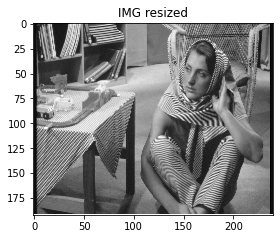

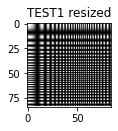

In [ ]:
from skimage import transform

img_sub = transform.resize(img,np.asarray(img.shape)/3, anti_aliasing=False, mode='constant');
display_image(img_sub,title='IMG resized', size=1)

test1_sub=transform.resize(test1,np.asarray(test1.shape)/3, anti_aliasing=False, mode='constant');
display_image(test1_sub, title='TEST1 resized', size=1)



<font color='purple'>Can you interpret the results? Is there any special effect? Try to explain the effect you see when displaying the downsampled version of `test1`.</font>

---
<font color='red'>Answer: 
When downsampling an image, we reduce its resolution and lose some of its details (it could be said that there is a loss of high-frequency information in the image). 
We can see that the resulting image is much more pixelated and less detailed than the original one. The edges of the objects in the image are less sharp and there is a loss of texture in the image. For example, the pants lines of Barbara have lost so much detail that they seem as curved horizontal lines now. Furthermore, the same effect can be seen on the mantel of the table.

As for the test1 image the downsampling has the same result, there is a clear loss of detail and a strange visual effect of depth at the point (50,50) as we are losing high frequency detail. 
</font>


Let's see the spectra of these images before and after the downsampling:

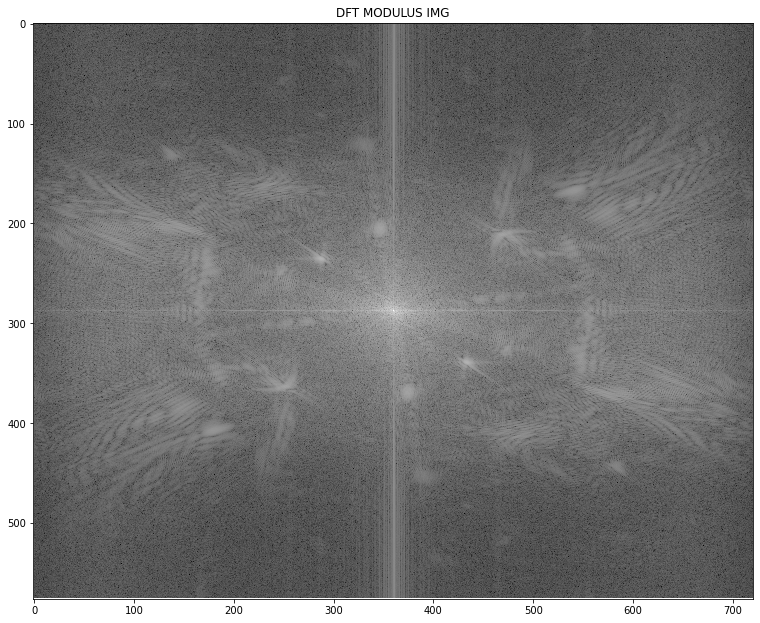

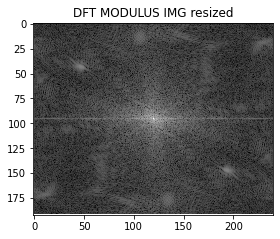

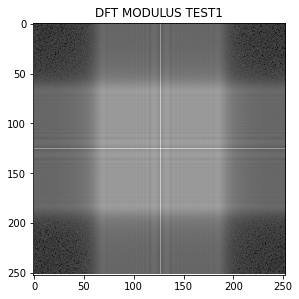

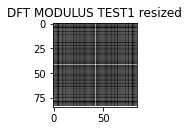

In [ ]:
IMG_sub_mod = np.fft.fftshift(np.log(1+np.abs(np.fft.fft2(img_sub))))
display_image(IMG_mod, title='DFT MODULUS IMG', size=1)
display_image(IMG_sub_mod, title='DFT MODULUS IMG resized', size=1)

TEST1_mod = np.fft.fftshift(np.log(1+np.abs(np.fft.fft2(test1)))) # DELETE
TEST1_sub_mod = np.fft.fftshift(np.log(1+np.abs(np.fft.fft2(test1_sub))))
display_image(TEST1_mod, title='DFT MODULUS TEST1', size=1)
display_image(TEST1_sub_mod, title='DFT MODULUS TEST1 resized', size=1)

Actually, the transforms being visualized show only one period of the spectrum of the images after downsampling. We are going to manipulate the transform matrices in order to display, side by side, several spectral replicas of the spectrum to show the periodicity effect. This will give a more precise idea of what is going on with the downsampling:

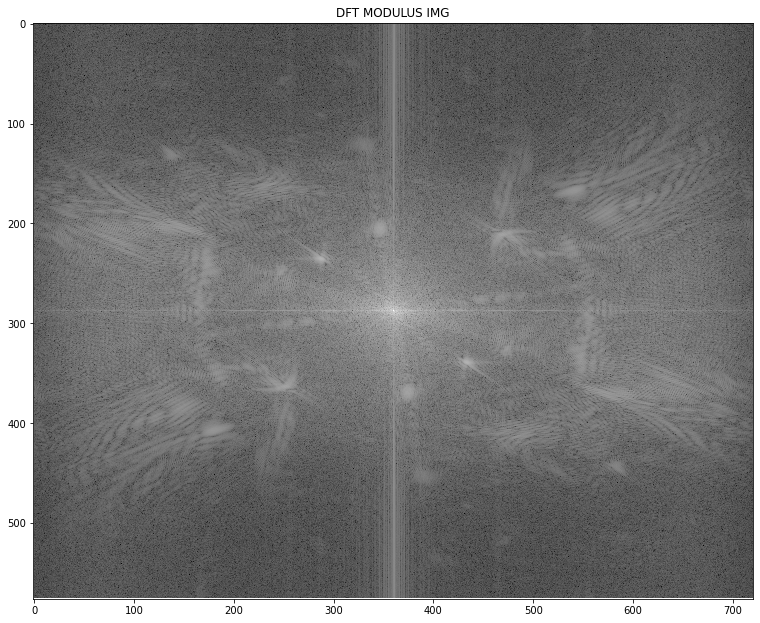

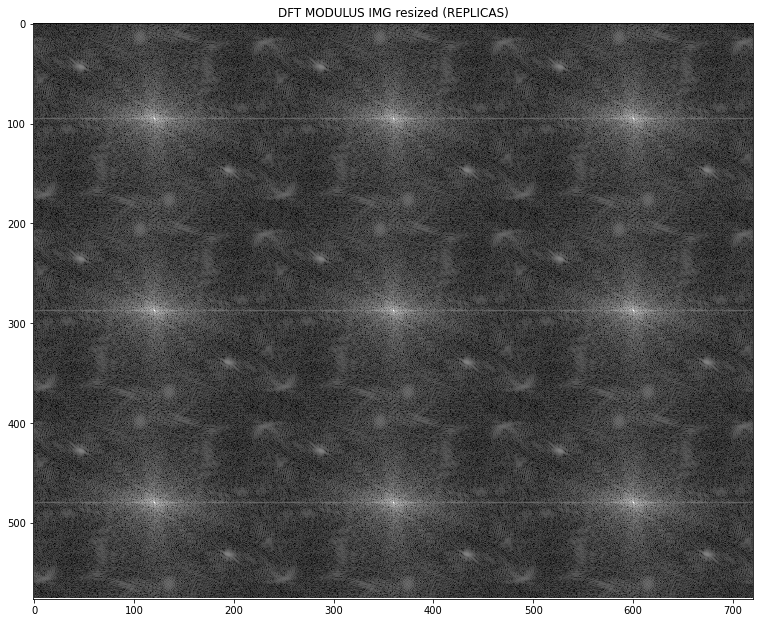

In [ ]:
display_image(IMG_mod, title='DFT MODULUS IMG', size=1)
tmp = np.hstack((IMG_sub_mod,IMG_sub_mod,IMG_sub_mod))
IMG_sub_mod_replicas = np.vstack((tmp,tmp,tmp))
display_image(IMG_sub_mod_replicas,title='DFT MODULUS IMG resized (REPLICAS)',size=1)

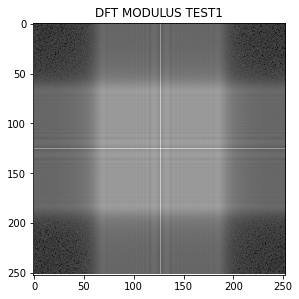

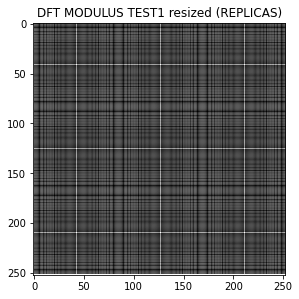

In [ ]:
display_image(TEST1_mod, title='DFT MODULUS TEST1', size=1)
tmp = np.hstack((TEST1_sub_mod,TEST1_sub_mod,TEST1_sub_mod))
TEST1_sub_mod_replicas = np.vstack((tmp,tmp,tmp))
display_image(TEST1_sub_mod_replicas,title='DFT MODULUS TEST1 resized (REPLICAS)',size=1)


<font color='purple'>As we have not filtered before downsampling, could you tell in which range of frequencies
(in normalized frequency units $f_x, f_y$) of the transform image in the `TEST1` case, we
have no aliasing effect? (assume that the `TEST1` image only contains frequency components
below the frequency you have estimated at the end of section 1 and theoretically estimate
the alias free band).

Please note that when we resize figures resulting from function display_image(), there are implicit processes of downsampling and interpolation. Please use the parameter `size` of the function with caution. For instance, the effect of disappearing lines in the display of the spectrum of `TEST1_sub` when `size` is different than 1 is due to this downsampling.</font>

---
<font color='red'>Answer: 
We are downsampling by a factor of 3, meaning that in the multiples of the frequencies $\frac{1}{3}$ we will have a 'center'(for an example we will use the center in frequency 0 but the same happens with their multiples). Earlier we said that the bandwidth of the image is $\frac{1}{2}$, then, the result will go from $frac{-1}{4}$ to $frac{1}{4}$ as we have the center at 0. 
As said before, we will also have a center in $frac{1}{3}$, this will cause aliasing in the following frequency range: ($\frac{1}{4}$,$\frac{1}{3}-\frac{1}{4}$)=($\frac{1}{4}$,$\frac{1}{12}$) and ($\frac{-1}{4}$,$\frac{-1}{12}$). Therefore, we won't have aliasing in the range of frequencies: ($\frac{-1}{12}$,$\frac{1}{12}$).
(We are in 2d, but as the values are the same horizontally and vertically speaking, I explain it as if it was 1 dimension due to the fact that it's more understandable an easier to explain)
</font> 

#### Downsampling experiment

Let's experiment with the downsampling of a second image `test2`. We will generate the image `test2` as a numpy matrix by using an inverse 2D DFT transform, as follows:

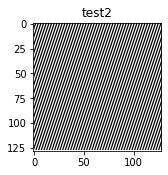

In [ ]:
# create a 128x128 matrix of zeros
X = np.zeros((128,128))

# set coefficient value in 16th row, 48th column (starting with 0)
X[16,48] = 128*128

# compute the real part of the inverse 2D-DFT
test2 = np.real(np.fft.ifft2(X)); 

# shifts test2 to avoid negative values
test2 = test2 + 1;
display_image(test2, title='test2', size=1)


As a reminder, direct and inverse Discrete Fourier Transforms (DFT) of an image (2D
signal) are defined as follows:

$$X[k,l] = \sum^{M-1}_{m=0}\sum^{N-1}_{n=0}x[m,n]e^{-j2\pi \left( \frac{mk}{M}+\frac{nl}{N}\right) }$$ with $0 \leq k < M-1$ and $0 \leq  l < N-1$

$$x[m,n] = \frac{1}{MN}\sum^{k=0}_ {M-1}\sum^{l=0}_ {N-1}X[k,l]e^{j2\pi\left( \frac{mk}{M} + \frac{nl}{N}  \right)}$$


To be consistent with the scikt notation, we will assume that m indicates rows (vertical
index) and n indicates columns (horizontal index). Therefore, k will be the index for the
normalized vertical frequency, and l for the horizontal frequency. Note that the DC coefficient corresponds to the $X[0,0]$ position of and the component with $(f_x ,f_y)=(16/128,48/128)$ corresponds to $X[16,48]$. 

Considering that we have just computed the real part of the inverse transform of a $128x128$ spectrum with a single non-zero value (actually, a spectrum with one delta), could you obtain the expressions requested below?


<font color='purple'>1) The analytic expression of the transform $X[k, l]$ we have just created as a function of
the 2D Kronecker delta in the transform domain (remember $\delta[k, l] = \delta[k] \cdot \delta[l]$)</font>

---
<font color='red'>Answer: 
we can express the transform 𝑋[𝑘,𝑙] we have created as a function of the 2D Kronecker delta as:

$$𝑋[𝑘,𝑙] = 128^2 ⋅ 𝛿[𝑘,𝑙] = 128^2 ⋅ 𝛿[𝑘] ⋅ 𝛿[𝑙]$$

This means that the transform is a single peak at the origin (DC component) with amplitude 128^2 and all other coefficients are zero.
</font>

<font color='purple'>2) The result of the inverse 2D DFT transform $x[m,n]=DFT^{-1}\left\{X[k, l]\right\}$ as an exponential
function in $[m,n]$.</font>

---
<font color='red'>Answer: 
The inverse 2D DFT transform of X[k,l] can be expressed as:
$$𝑥[m,n] = 𝐷𝐹𝑇^{−1}{X[k,l]} = \frac{1}{N^2} \sum_{𝑘=0}^{N-1} \sum_{l=0}^{N-1} X[k,l] ⋅ 𝑒^{2\pi i(km/M+ln/𝑁)}$$
Substituting the expression for 𝑋[𝑘,𝑙] we obtained earlier, we have:
$$x[m,n] = \frac{1}{N^2} \sum_{k=0}^{N-1} \sum_{l=0}^{N-1} 128^2 ⋅ 𝛿[k] ⋅ 𝛿[l] ⋅ 𝑒^{2\pi i(km/M+ln/𝑁)}$$
Since the Kronecker deltas are only non-zero when 𝑘=0 and 𝑙=0, we can simplify the double sum and obtain:
$$𝑥[𝑚,𝑛] = (\frac{1}{N^2}) ⋅ (\frac{1}{128^2}) ⋅ 𝑒^{2𝜋𝑖(\frac{0𝑚}{M}+\frac{0𝑛}{N}}) = (\frac{1}{N^2}) ⋅ 128^2$$
Therefore, the result of the inverse 2D DFT transform is a matrix of size N x N (in this case, 128 x 128) with all entries equal to $\frac{1}{N^2} ⋅ \frac{1}{128^2}$. This means that the image is a uniform gray image with a constant intensity level of $\frac{1}{N^2} ⋅ \frac{1}{128^2}$.
</font>


<font color='purple'>3) A closed expression for the image $test2[m,n]=REAL\left\{x[m,n]\right\}+1$</font>

---
<font color='red'>Answer: 
From the previous question, we have:

x[m,n] = REAL{X[k,l]} = REAL{$\delta[k,l]$}

Substituting this in the expression for test2:

test2[m,n] = REAL{x[m,n]} + 1

test2[𝑚,𝑛] = REAL{$\delta[k,l]$} + 1

Now, since $\delta[k,l] = \delta[k]⋅\delta[l]$, we can write:

test2[m,n] = REAL{$\delta[k]⋅\delta[l]$} + 1

Using the definition of the 2D discrete Fourier transform and its inverse, we can write:

test2[m,n] = REAL{$\delta[k,l]$} + 1

test2[m,n] = REAL{$\delta[k]⋅\delta[l]$} + 1

test2[m,n] = $cos(\frac{2\pi}{128} ⋅ 16m)⋅cos(\frac{2𝜋}{128} ⋅ 48n) + 1$

Therefore, the closed expression is:

test2[m,n]=$cos(\frac{2\pi}{128}⋅(16m+48n))+1$


</font>

We now downsample the resulting image by a factor 2 and show both the original `test2` image and the resized version `test2_sub`:

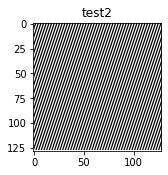

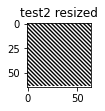

In [ ]:
display_image(test2, title='test2', size=1)
test2_sub = sktf.resize(test2,np.asarray(test2.shape)/2, anti_aliasing=False, mode='constant');
display_image(test2_sub, title='test2 resized', size=1)


<font color='purple'>Compare the original `test2` and the downsampled `test2_sub` image, do you see any special effect?
Describe how the frequency of the 2D sinusoid has apparently changed with the downsampling.</font>

---
<font color='red'>Answer: 
After downsampling the image by a factor of 2, the resulting image test2_sub appears to have a lower frequency than the original one. This is due to aliasing, as the high-frequency components of the image that cannot be accurately represented in the lower-resolution image are mapped to lower frequencies in the downsampled image.

In particular, the sinusoidal pattern in the original image appears to have undergone a shift in frequency towards the lower frequencies in the downsampled one. This can be seen by comparing the number of cycles of the sinusoidal pattern in both images, where the downsampled image has fewer cycles over the same spatial distance. Additionally, the sharp transitions between black and white regions of the original image have become more gradual in the downsampled image, which is something it also happenned in the Barbara Gray example.
</font> 

Now display the transform of the two images to better understand what happened:

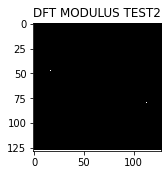

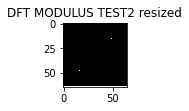

In [ ]:
TEST2_mod=np.fft.fftshift(np.log(1+np.abs(np.fft.fft2(test2-1))))
TEST2_sub_mod=np.fft.fftshift(np.log(1+np.abs(np.fft.fft2(test2_sub-1))))
display_image(TEST2_mod,title='DFT MODULUS TEST2',size=1)
display_image(TEST2_sub_mod, title='DFT MODULUS TEST2 resized', size=1)

<font color='purple'>Compare the replicated spectrum of the downsampled image with the original spectrum of `test2`. Explain now more precisely the aliasing effect described in your previous answer? In particular can you compute exactly the frequency components appearing in the image after downsampling?</font>

---
<font color='red'>Answer: 
The replicated spectrum of the downsampled image (test2_sub) can be seen in the DFT MODULUS TEST2 resized image. We can see that the replicated spectrum is an overlapping of the original spectrum of the image with the spectra of the adjacent copies, due to downsampling without filtering.
The aliasing effect is caused by the fact that the spectrum of the original image contains high-frequency components that exceed the Nyquist frequency, and therefore these components fold back and overlap with the low-frequency components in the downsampling process.
Our original imagehas a shape 128*128 and has the coefficient values at (16,48). If we downsample by a factor of 2, the downsampled image will have a shape of (64,64) so we will still have a coefficient at (16,48) but due to aliasing there will also be another one at (64-16, 64-48)=(48,16)

</font>


In the next section, we are going to filter the image before downsampling in order to get a
better result.

## 4 Linear Filters

The direct way to filter an image is to convolve it with an impulse response. Let us
experiment with the `img` image and a gaussian impulse response:

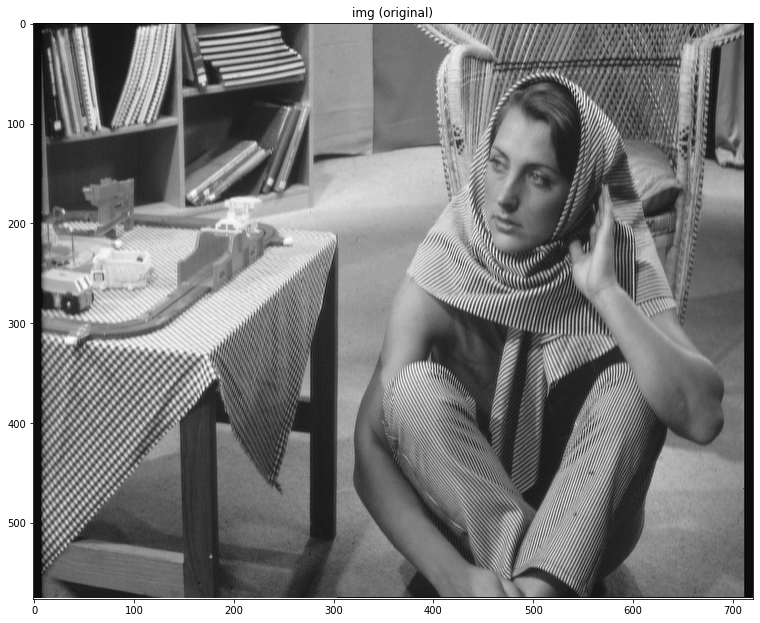

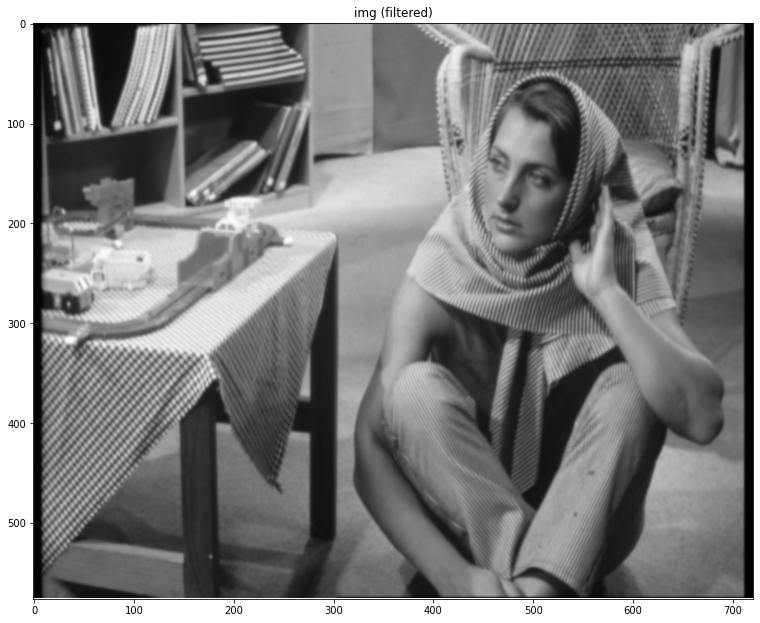

In [ ]:
from skimage import filters

sigma = 1
window = 5
truncate = (((window - 1)/2)-0.5)/sigma
img_filt = filters.gaussian(img,sigma=sigma,truncate=truncate);
display_image(img,title='img (original)', size=1)
display_image(img_filt, title='img (filtered)', size=1)


<font color='purple'>Paste the image and describe the effects of this filter and relate these effects with the theoretical properties of the filter.</font>

---
<font color='red'>Answer: 
The Gaussian filter smooths the image by reducing the high-frequency components (averaginG the values of the pixels). The degree of smoothing is controlled by the parameter sigma, which determines the width of the Gaussian kernel (The larger the value of sigma, the smoother the image). In this case, sigma is set to 1, which means the kernel has a width of one pixel.
This filter has the ability to remove noise while preserving the edges of the image (due to the fact that its smoothing properties are being applied equally across the image). It is also a linear and shift-invariant filter, meaning that it can be applied in a consistent manner, and its response to different parts of the image can be predicted by its impulse  
We can clearly appreciate the blurring effect mentioned before on the edges and the reduced sharpness of the image. 

</font>

Another way to filter an image is to simply remove some transform coefficients corresponding to the frequency components to remove. However, this "Frequency Filtering" technique by means of a frequency mask is not always adequate. Let us explore
this issue.

## 5 Frequency filtering

Assume we apply a low pass filter to avoid aliasing problems when downsampling `test1`:

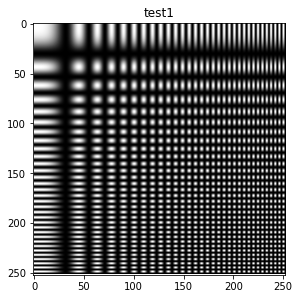

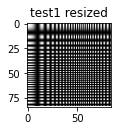

In [ ]:
display_image(test1,title='test1',size=1)
display_image(test1_sub, title='test1 resized', size=1)


We could have removed all frequency components above half the new sampling frequency before downsampling by using a frequency mask as done in the following:


42.0


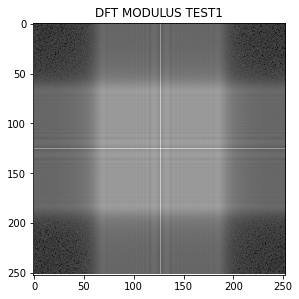

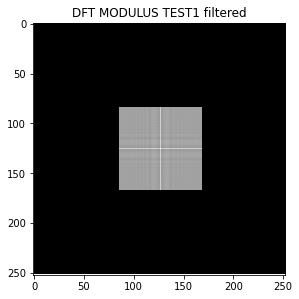

In [ ]:
TEST1 = np.fft.fft2(test1)
TEST1_mod = np.fft.fftshift(np.log(1+np.abs(TEST1)))
fils = TEST1.shape[0]
cols = TEST1.shape[1]

print(cols/6)
# mask vertical frequencies
TEST1[int(1/6*fils):int(5/6*fils)+1,:] = 0;

# mask horizontal frequencies
TEST1[:,int(1/6*cols):int(5/6*cols)+1] = 0;

display_image(TEST1_mod, title='DFT MODULUS TEST1', size=1)
display_image(np.fft.fftshift(np.log(1+np.abs(TEST1))), title='DFT MODULUS TEST1 filtered', size=1)


To see the resulting image, we need to apply the inverse FFT transform:

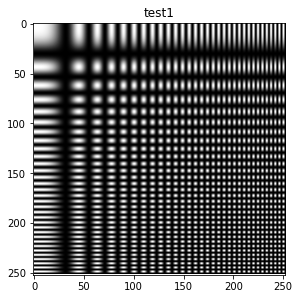

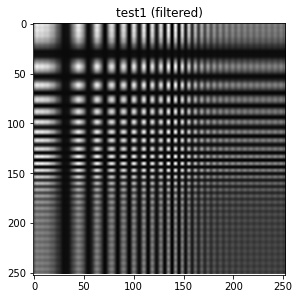

In [ ]:
test1_filt = 9*np.real(np.fft.ifft2(TEST1))
display_image(test1, title='test1', size=1)
display_image(test1_filt, title='test1 (filtered)', size=1)

Now compare what happens when downsampling this result with the previous case:

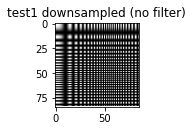

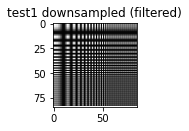

In [ ]:
test1_sub  = transform.resize(test1,     np.asarray(test1.shape)/3,      anti_aliasing=False, mode='constant');
test1_sub2 = transform.resize(test1_filt,np.asarray(test1_filt.shape)/3, anti_aliasing=False, mode='constant');

display_image(test1_sub,title='test1 downsampled (no filter)', size=1)
display_image(test1_sub2,title='test1 downsampled (filtered)', size=1)


As you can see, aliasing is not present but, of course, the highest frequencies have been
removed by the low pass filter. However, this filtering technique may not always be
adequate. Let's apply the same technique to the IMG image. Then we filter it as we previously have done with test2:

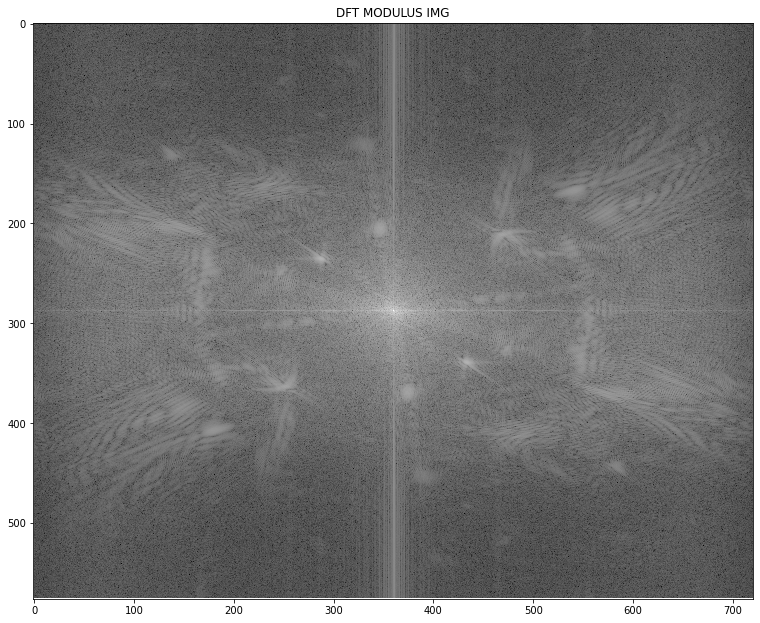

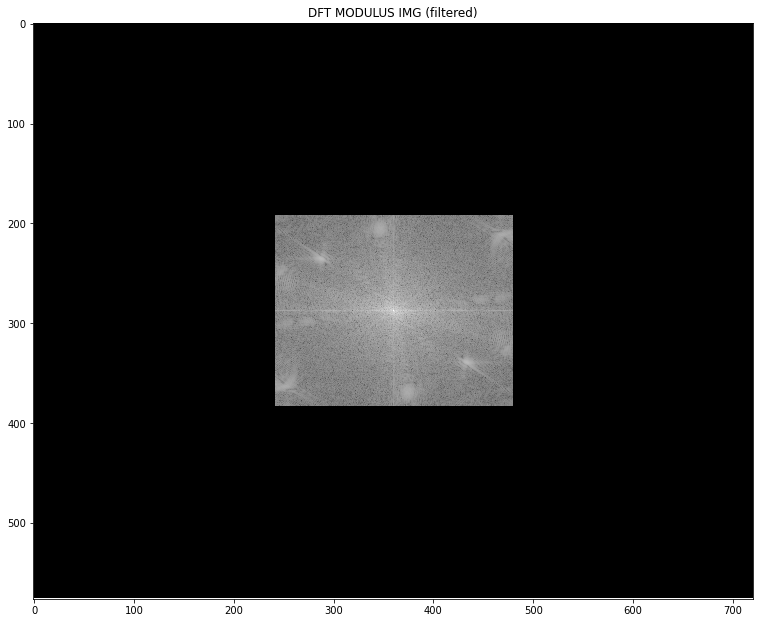

In [ ]:
IMG = np.fft.fft2(img)
IMG_mod = np.fft.fftshift(np.log(1+abs(IMG)))
fils = IMG.shape[0]
cols = IMG.shape[1]
# mask vertical frequencies
IMG[int(1/6*fils):int(5/6*fils)+1,:] = 0
# mask horizontalal frequencies
IMG[:,int(1/6*cols):int(5/6*cols)+1] = 0

display_image(IMG_mod, title='DFT MODULUS IMG', size=1)
display_image(np.fft.fftshift(np.log(1+np.abs(IMG))), title='DFT MODULUS IMG (filtered)', size=1)

Let's see now the result of the inverse transform:


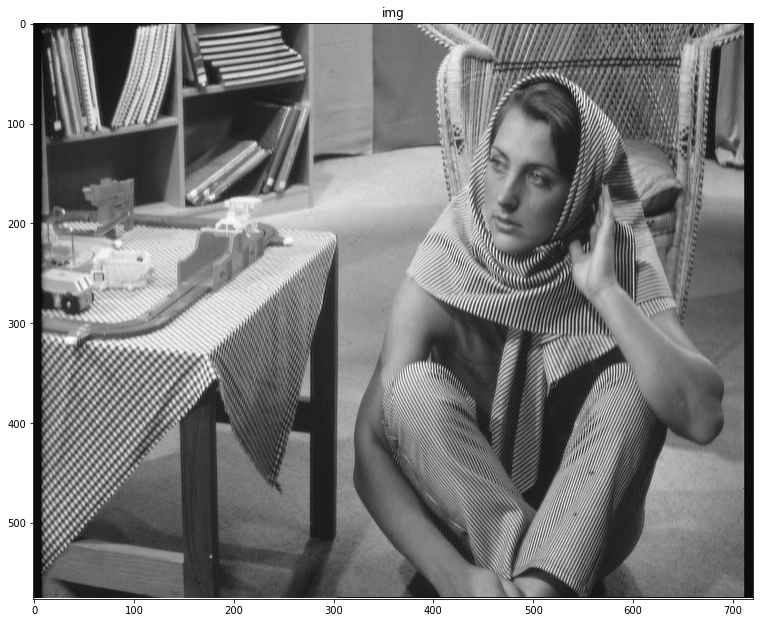

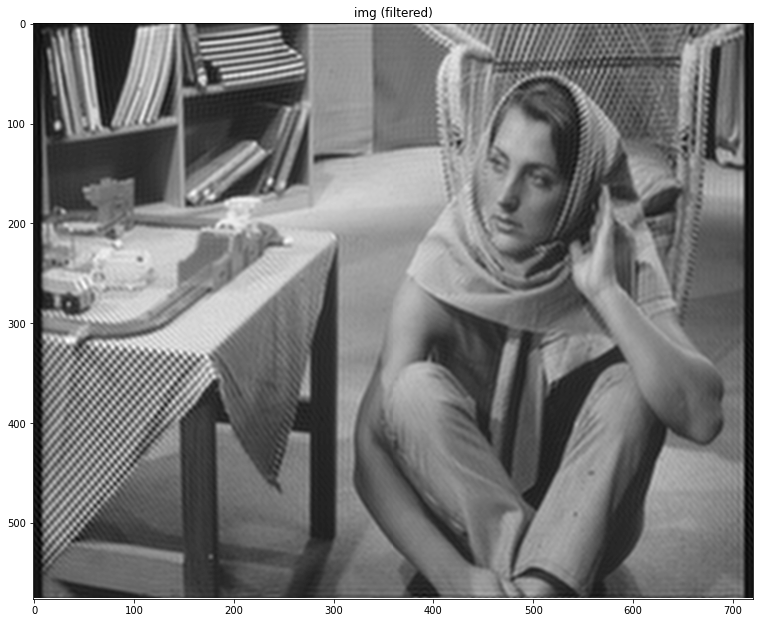

In [ ]:
img_filt = 9*np.real(np.fft.ifft2(IMG));
display_image(img, title='img', size=1)
display_image(img_filt, title='img (filtered)', size=1)

<font color='purple'>Maximize the window to better see the result. Can you explain this effect?</font>

---
<font color='red'>Answer: 


If the high frequency components are too close to the low frequency components, then filtering them out with a low pass filter before downsampling results in a loss of important information. This can lead to aliasing artifacts in the downsampled image. As a possible solution, we could perform the downsampling first and then apply filtering to remove high frequency components that are now separated from the low frequency components.

In the case of our image, We can observe that the low-pass filter has blurred the edges and reduced the high-frequency details while keeping the low-frequency components that correspond to the general structure of the image. This can be useful for reducing noise or other artifacts, but it can also result in loss of detail and sharpness as mentioned before.

</font>

## 6 Removal of a sinusoidal interference

We can use notch filters to remove some kinds of interference. Imagine that the `img` image has been corrupted by a sinusoidal interference as follows. First, we generate the interferring signal. We follow the same process than in section
"Transform Domain":


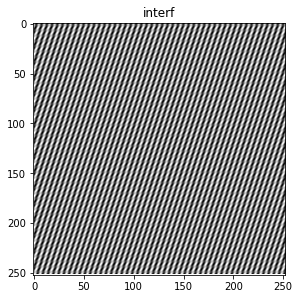

In [ ]:
# resize img to a 252x252 image
img2 = transform.resize(img,(252,252), anti_aliasing=True, mode='constant');

# create a 252x252 matrix of zeros
INTERF = np.zeros(img2.shape)

# set some energy at coefficient X(16,48)
INTERF[16,48] = 4000

# same at the X(64,48)
INTERF[64,48] = 1000

# inverse transform to compute the interferring image
interf = np.real(np.fft.ifft2(INTERF)+1)

display_image(interf, title='interf', size=1)


And now we corrupt the `img2`  image by adding `interf`:



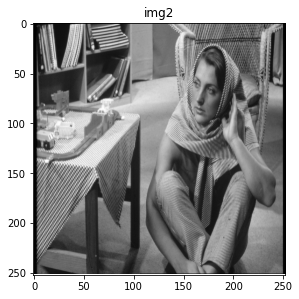

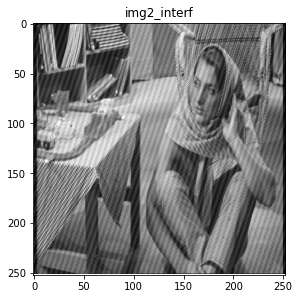

In [ ]:
img2_interf = interf + img2/np.amax(img2)
display_image(img2, title='img2', size=1)
display_image(img2_interf, title='img2_interf', size=1)

Let's see the spectrum of the corrupted image:


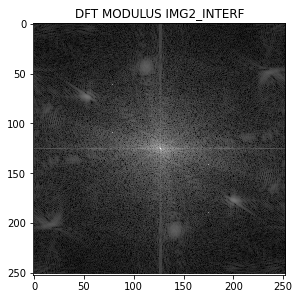

(501.9484186211669-0.28700471349490186j)


In [ ]:
IMG2_INTERF = np.fft.fft2(img2_interf);
display_image(np.fft.fftshift(np.log(1+np.abs(IMG2_INTERF))), title='DFT MODULUS IMG2_INTERF', size=1)

Can you appreciate the interferring coefficients? (play with the `size` parameter to help you see it)
The coefficients of the interference can be clearly seen in 4 points: (16,48), (64,48),(252-16,252-48),(252-64,252-48). In this points we can see high energy in the spectrum of the IMG2_INTERF.

<font color='purple'>Using the method of frequency filtering, try to remove the interference from the image `img2_interf`. You can use a "notch" filter to eliminate the interfering coefficients of high energy in the transform. Write the corresponding commands and explain the strategy you have followed:
</font>

---
<font color='red'>Answer: 
I have created a notch filter with 0 values where the interferring energy coefficients can be found (values above) and then computed its fourier transform in order to multiplier with the fourier transform of the image interferred. This way i can apply the filter to the image and obtain the result computing the inverse Fourier Transform of the interferred image filtered.
</font> 

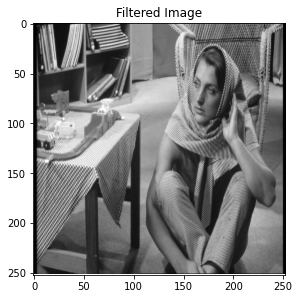

In [ ]:
# Write below the commands you need

# Create a notch filter to remove interfering frequencies
notch_filter = np.ones_like(F)

#put 0 where the coefficients of the interference are situated
notch_filter[16, 48] = 0
notch_filter[64, 48] = 0

#Also the ones produced by aliasing 
notch_filter[252-16, 252-48] = 0
notch_filter[252-64, 252-48] = 0

# Apply the notch filter to the Fourier transform
IMG2_INTERF_filtered = IMG2_INTERF * notch_filter


# Compute the inverse Fourier transform to obtain the filtered image
img_filtered = np.real(np.fft.ifft2(F_notch))

# Display the filtered image
display_image(img_filtered, title='Filtered Image', size=1)

